# Clustering challange

## <span style="color:lightgreen">Imports

In [19]:
import pandas as pd
import re
from glob import glob

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.mixture import GaussianMixture
import warnings

import numpy as np

# if 0, then adding category variables, if not only doing computing on what did PCA returns
mode = 0
warnings.filterwarnings('ignore')

## <span style="color:lightgreen"> Preprocessing and loading

In [20]:
files = glob("../data/X_train_part_*.csv")
files.sort(key=lambda x: int(re.search(r"(\d+)", x).group()))
X = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
X_cat = None
if mode == 0:
    X_cat = X[['cat_1','cat_2','cat_3']].copy()
    X.drop(['cat_1','cat_2','cat_3'], axis=1, inplace=True)

X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499,cluster
0,-67.245160,96.601644,44.675765,-343.674068,-97.904310,-59.905627,-144.119639,98.272403,72.716739,53.370021,...,242.916006,262.914470,-39.665771,-4.037116,-103.233069,-41.109060,-85.462254,77.416227,-118.337991,3
1,-26.088879,89.423257,35.127120,156.641765,-59.057971,-49.588786,-117.681541,45.737336,-181.961027,27.645378,...,-1452.739633,-127.359096,-72.263028,-29.385727,-305.907715,104.255818,-69.940931,106.558377,-526.703701,0
2,-38.667709,102.800677,63.421234,-732.920476,-99.412051,-54.057766,-36.303767,106.534712,382.557393,68.720561,...,69.306871,463.219323,-75.149371,8.223161,-336.808739,20.166392,-93.920259,37.905652,-495.897952,1
3,-1.667756,50.028707,53.253888,1265.046776,-33.832773,-64.769624,-57.273060,39.952707,286.278923,-18.569942,...,-397.823604,-18.046676,-47.849459,25.310324,-397.710755,79.093685,-91.828527,120.282184,56.925156,2
4,-30.341686,108.862380,63.060333,1012.460607,-105.710135,-83.129695,-75.806602,47.076494,239.602287,80.623708,...,1045.835986,176.798555,-66.948105,-5.485324,174.288116,19.250027,-62.495103,87.032003,-57.156858,4


## <span style="color:lightgreen"> Dimension reduction

In [21]:
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap

pca_60 = PCA(n_components=50)
pca_small = PCA(n_components=3)
pca_60.fit(X)
pca_small.fit(X)

X_reduced = pca_60.transform(X)
if mode == 0:
    X_reduced = pd.concat([pd.DataFrame(X_reduced), X_cat], axis=1)
    X_reduced = X_reduced.to_numpy()

X_to_visu = pca_small.transform(X)

In [22]:
print(f"Cathced variance: {sum(pca_60.explained_variance_ratio_)}")
X_reduced

Cathced variance: 0.9898027270333558


array([[ 1.33757337e+03,  1.24818748e+03,  4.07204692e+02, ...,
         2.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.76731176e+03,  1.49357588e+03,  1.29884393e+02, ...,
         3.00000000e+00,  2.00000000e+00,  1.00000000e+00],
       [-9.65706041e+01,  3.30480620e+03, -2.05091263e+03, ...,
         3.00000000e+00,  2.00000000e+00,  3.00000000e+00],
       ...,
       [ 8.46607642e+02, -1.15702128e+03,  1.01439478e+03, ...,
         2.00000000e+00,  2.00000000e+00,  0.00000000e+00],
       [-1.03670893e+03, -2.50108651e+03,  1.15501155e+03, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.53115537e+03,  3.11865963e+02, -1.60394654e+02, ...,
         1.00000000e+00,  0.00000000e+00,  4.00000000e+00]])

Sum of catched variance: 0.9898027270333558


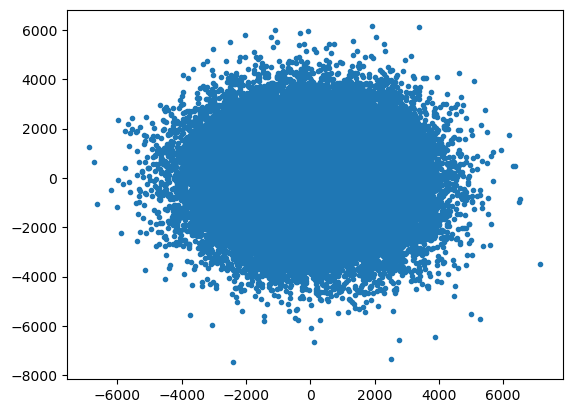

In [23]:
print(f"Sum of catched variance: {sum(pca_60.explained_variance_ratio_)}")
plt.scatter(X_to_visu[:, 0], X_to_visu[:, 1], marker='.')

In [24]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# no longer to use if we have no labels xddd
def save_points_animation_gif(points: np.ndarray,
                              labels: np.ndarray,
                              title:str = '',
                              gif_path: str = "animation.gif",
                              elev: float = 30,
                              azim: float = 0,
                              fps: int = 5):
    """
    Display a static 3D scatter plot and then create a rotating 3D scatter plot animation (10 frames), saving it as a GIF.

    Parameters:
    - points: numpy.ndarray of shape (n_samples, 3)
    - labels: array-like of shape (n_samples,)
    - gif_path: path to save the resulting GIF (including filename.gif)
    - elev: elevation angle for the static view and animation
    - azim: initial azimuth angle for the static view
    - fps: frames per second for the GIF
    """
    if points.shape[1] != 3:
        raise ValueError("This function only supports 3D points.")

    unique_labels = np.unique(labels)
    cmap = plt.cm.get_cmap('tab20', len(unique_labels))

    # --- Static plot ---
    fig_static = plt.figure()
    ax_static = fig_static.add_subplot(111, projection='3d')
    for i, lbl in enumerate(unique_labels):
        mask = labels == lbl
        ax_static.scatter(points[mask, 0], points[mask, 1], points[mask, 2],
                          color=cmap(i), label=str(lbl), s=20)
    ax_static.view_init(elev=elev, azim=azim)
    ax_static.set_xlabel('F 1')
    ax_static.set_ylabel('F 2')
    ax_static.set_zlabel('F 3')
    ax_static.set_title(f'Static 3D View of {title} (elev={elev}, azim={azim})')
    ax_static.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # --- Prepare animation plot ---
    fig_anim = plt.figure()
    ax_anim = fig_anim.add_subplot(111, projection='3d')
    for i, lbl in enumerate(unique_labels):
        mask = labels == lbl
        ax_anim.scatter(points[mask, 0], points[mask, 1], points[mask, 2],
                        color=cmap(i), label=str(lbl), s=20)
    ax_anim.set_xlabel('F 1')
    ax_anim.set_ylabel('F 2')
    ax_anim.set_zlabel('F 3')
    ax_anim.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

    def update(frame):
        ax_anim.view_init(elev=elev, azim=frame)
        return fig_anim,

    # Ensure output directory exists
    out_dir = os.path.dirname(gif_path) or "."
    os.makedirs(out_dir, exist_ok=True)

    # Use 10 total frames evenly spaced over 360°
    angles = np.linspace(0, 360, num=10, endpoint=False)
    anim = FuncAnimation(fig_anim, update, frames=angles, interval=100, blit=False)

    # Save as GIF without displaying
    writer = PillowWriter(fps=fps)
    anim.save(gif_path, writer=writer)
    plt.close(fig_anim)

In [25]:
# save_points_animation_gif(X_to_visu, y,gif_path="./output/true_values.gif", elev=30,azim=0, fps=5, title='true values')

## <span style="color:lightgreen"> Training and predictions

### KMEANS

In [26]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, HDBSCAN, Birch

model = KMeans(n_clusters=6, algorithm='elkan')
model.fit(X_reduced)
labels = model.predict(X_reduced)
print(f"Score: {silhouette_score(X_reduced,labels)}")
# save_points_animation_gif(X_to_visu, labels, gif_path="./output/kmean.gif", elev=30,azim=0, fps=5, title='kmeans')

Score: 0.03380035720940129


In [27]:
scores = []
highest_k = 0
highest_score = 0
for k in range(2,12):
    model = KMeans(n_clusters=k)
    model.fit(X_reduced)
    labels = model.predict(X_reduced)

    score = silhouette_score(X_reduced, labels)
    if score > highest_score:
        highest_score = score
        highest_k = k
    scores.append(score)
    print(f"Kmeans clustering score: {score} for {k} clusters")

Kmeans clustering score: 0.049858293905635995 for 2 clusters
Kmeans clustering score: 0.04243191333894086 for 3 clusters
Kmeans clustering score: 0.03816301389347938 for 4 clusters
Kmeans clustering score: 0.03531567462171236 for 5 clusters
Kmeans clustering score: 0.0336310481734429 for 6 clusters
Kmeans clustering score: 0.03190658765570858 for 7 clusters
Kmeans clustering score: 0.031498212952474014 for 8 clusters
Kmeans clustering score: 0.03134158089711552 for 9 clusters
Kmeans clustering score: 0.03071791614493725 for 10 clusters
Kmeans clustering score: 0.03012655977276532 for 11 clusters


Highest score: 0.049858293905635995 for 2 clusters


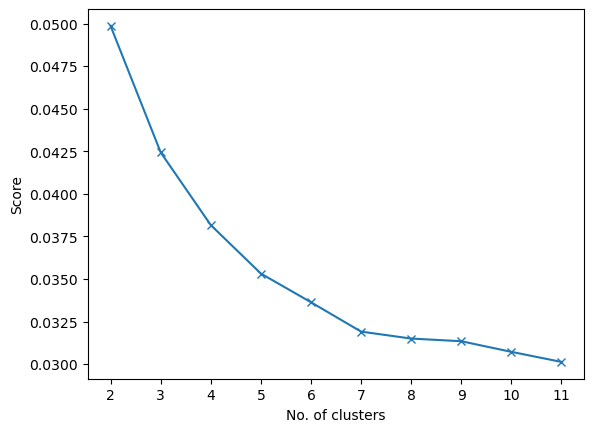

In [28]:
print(f"Highest score: {highest_score} for {highest_k} clusters")
plt.plot(range(2,12),scores, marker='x', markerfacecolor='red')
plt.xticks(range(2,12))
plt.xlabel('No. of clusters')
plt.ylabel('Score')
plt.savefig("./output/kmeans_elbow.png")
plt.show()

### DBSCAN

In [29]:
model = DBSCAN(eps=3900, min_samples=4)
model.fit(X_reduced)
labels = model.labels_
print(f"Score: {silhouette_score(X_reduced, labels)}")

Score: -0.2218732087148437


In [30]:
# save_points_animation_gif(X_to_visu, labels, gif_path="./output/dbscan_no_tune.gif", elev=30,azim=0, fps=5, title='dbscan_no_tune')

In [31]:
eps = []
scores = []
clusters = []

for k in range(3000,4500, 25):
    model = DBSCAN(eps=k, min_samples=3)
    model.fit(X_reduced)
    labels = model.labels_

    try:
        score = silhouette_score(X_reduced, labels)
    except Exception:
        score = -1
    scores.append(score)
    eps.append(k)
    clusters.append(len(np.unique(labels)))
    print(f"DBSCAN {k}: {score} for {len(np.unique(labels))} clusters")

DBSCAN 3000: -0.2834917389865008 for 25 clusters
DBSCAN 3025: -0.2883914142167499 for 32 clusters
DBSCAN 3050: -0.2950615809408608 for 42 clusters
DBSCAN 3075: -0.29842753574647635 for 51 clusters
DBSCAN 3100: -0.30025485615742636 for 65 clusters
DBSCAN 3125: -0.30291784137780914 for 77 clusters
DBSCAN 3150: -0.3068696719539936 for 97 clusters
DBSCAN 3175: -0.3104583312331038 for 117 clusters
DBSCAN 3200: -0.31415433488703226 for 138 clusters
DBSCAN 3225: -0.3153456815499731 for 167 clusters
DBSCAN 3250: -0.3161480459074942 for 194 clusters
DBSCAN 3275: -0.31559552865254553 for 218 clusters
DBSCAN 3300: -0.3153583439168134 for 239 clusters
DBSCAN 3325: -0.3149808454058928 for 255 clusters
DBSCAN 3350: -0.3152060547877635 for 281 clusters
DBSCAN 3375: -0.3148027588565854 for 305 clusters
DBSCAN 3400: -0.31372449565968313 for 331 clusters
DBSCAN 3425: -0.31258734964009677 for 352 clusters
DBSCAN 3450: -0.31179114464163427 for 375 clusters
DBSCAN 3475: -0.3098466405858578 for 385 clusters

KeyboardInterrupt: 

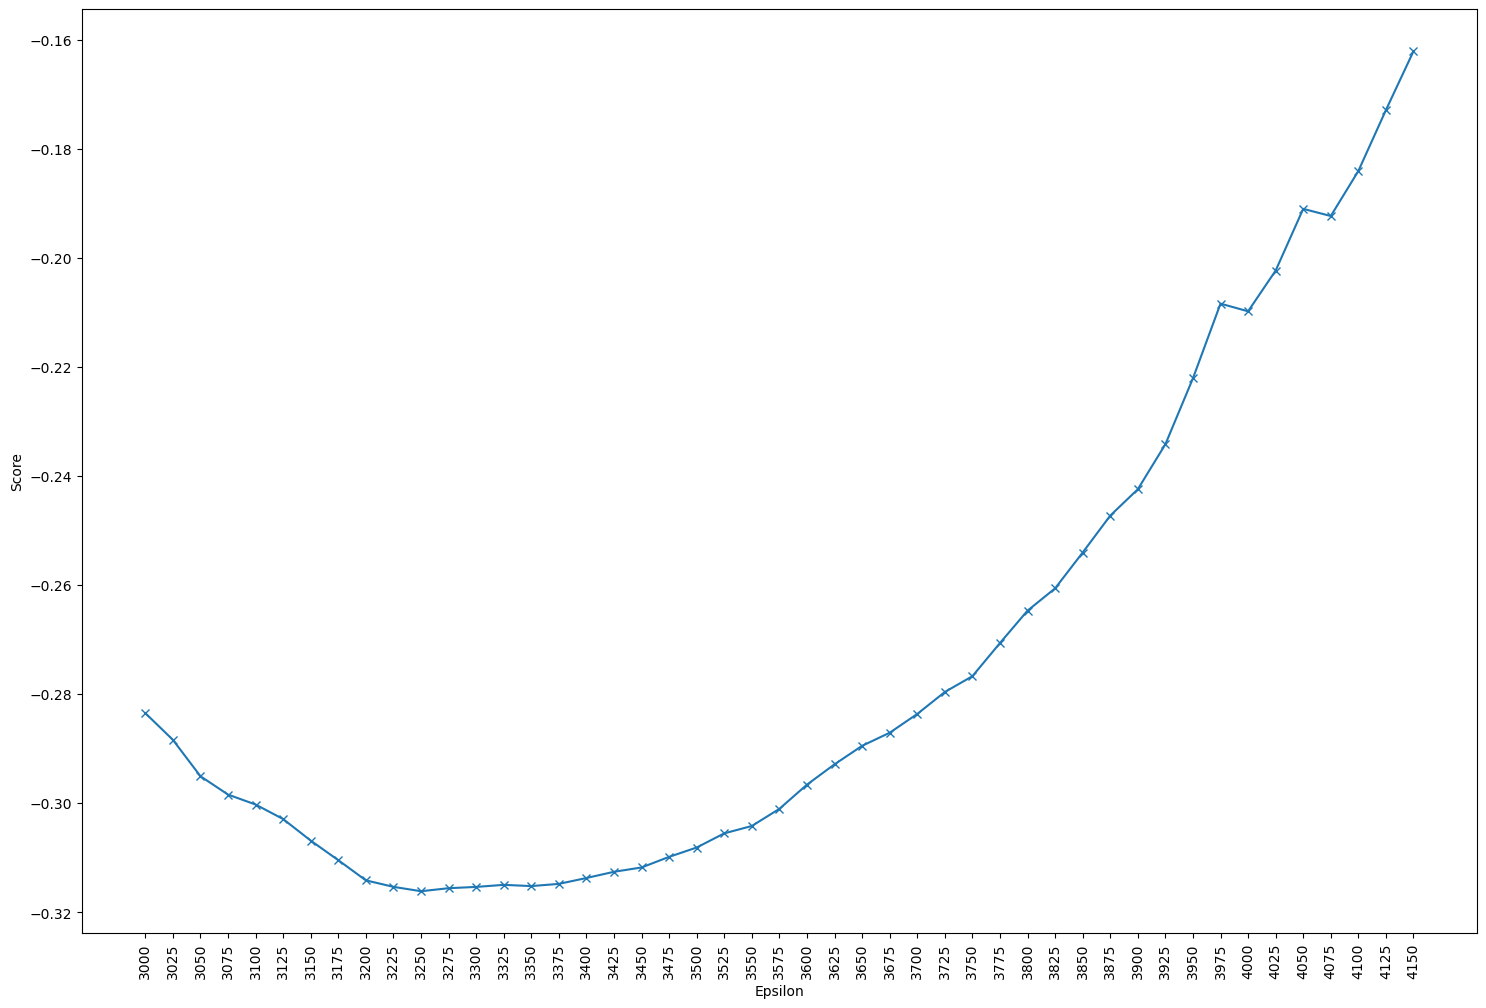

In [32]:
plt.figure(figsize=[18,12])
plt.plot(eps,scores, marker='x', markerfacecolor='red', label="score")
plt.xticks(eps, rotation=90)
plt.xlabel('Epsilon')
plt.ylabel('Score')
plt.savefig("./output/dbscan_elbow_score.png")
plt.show()

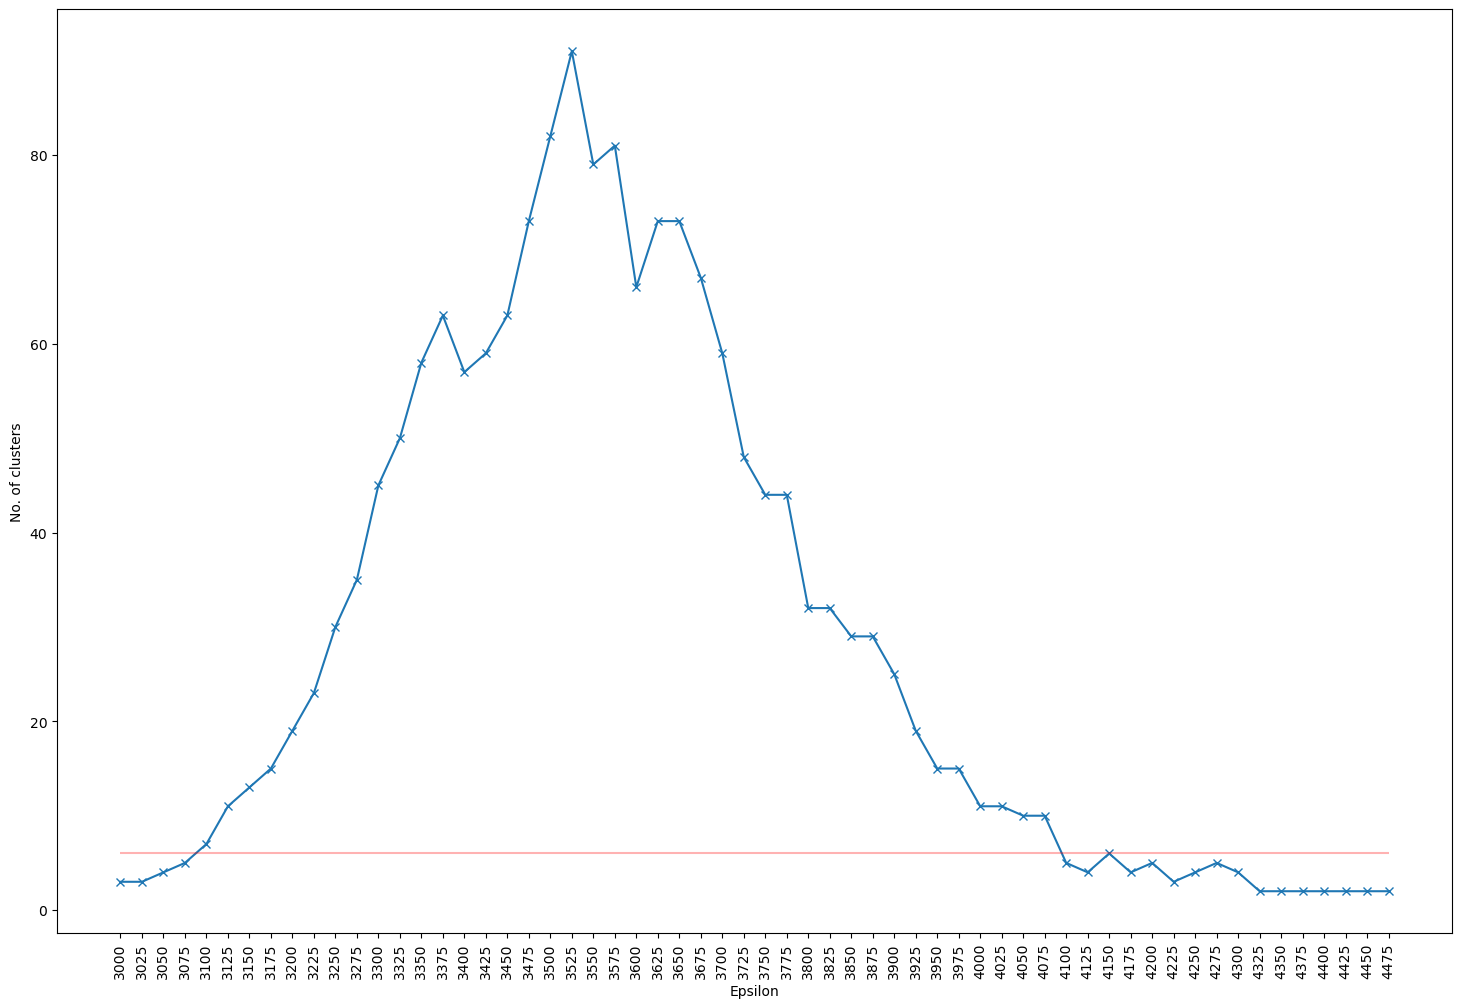

In [16]:
func = lambda x: len(x)

plt.figure(figsize=[18,12])
plt.plot(eps,clusters, marker='x', markerfacecolor='red')
plt.hlines(6,np.min(eps), np.max(eps), colors='r',alpha=0.3)
plt.xticks(eps, rotation=90)
plt.xlabel('Epsilon')
plt.ylabel('No. of clusters')
plt.savefig("./output/dbscan_elbow_clusters.png")
plt.show()

### Gausian mixture

In [17]:
model = GaussianMixture(n_components=6, max_iter=1000, n_init=10)
model.fit(X_reduced)
labels = model.predict(X_reduced)
silhouette_score(X_reduced, labels)

0.033831043173555994

In [18]:
scores = []

for k in range(2,12):
    model = GaussianMixture(n_components=k, max_iter=1000, n_init=10)
    model.fit(X_reduced)
    labels = model.predict(X_reduced)

    score = silhouette_score(X_reduced, labels)
    scores.append(score)
    print(f"Gaus clustering score: {score} for {k} clusters")

Gaus clustering score: 0.02146422458394326 for 2 clusters
Gaus clustering score: 0.030208238213313598 for 3 clusters
Gaus clustering score: 0.030457557113390963 for 4 clusters
Gaus clustering score: 0.0251473479953701 for 5 clusters
Gaus clustering score: 0.02845606985308782 for 6 clusters
Gaus clustering score: 0.03020069401427856 for 7 clusters
Gaus clustering score: 0.02812372679949754 for 8 clusters
Gaus clustering score: 0.032621942258141856 for 9 clusters
Gaus clustering score: 0.03215186183888078 for 10 clusters
Gaus clustering score: 0.02719093928562618 for 11 clusters


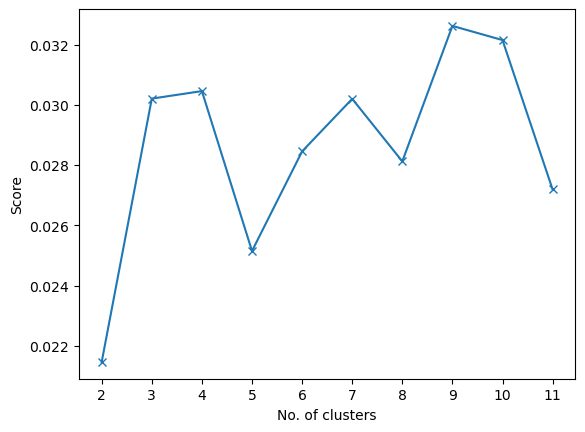

In [19]:
plt.plot(range(2,12),scores, marker='x', markerfacecolor='red')
plt.xticks(range(2,12))
plt.xlabel('No. of clusters')
plt.ylabel('Score')
plt.savefig("./output/gaus_elbow.png")
plt.show()

# WAZNE

Reszte algorytmow nie testowalem, bo albo crushowaly mi komputer, albo liczyly sie tak dlugo, ze na bobocie i tak by nie przeszly, wiec niestety testy wygladaj ubogo, ale tak naprawde sprzet na wiecej mi nie pozwolil :(( (w sklad tych testow wchodzilo hierarchiczne klustrowanie, HDBSCAN, BIRCH i inne).